**Απόστολος Μουστάκης**

**AM: 03400182**

<font color='darkred'>Οι απαντήσεις σε όλα τα ερωτήματα γράφονται με αυτό το χρώμα ώστε να ξεχωρίζουν από τις εκφωνήσεις </font>

<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο μη επιβλεπόμενης μάθησης <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 παραδείγματα του φυτού <i>Ίρις</i> με βάση το unlabeled dataset που σας δίνεται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε παράδειγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο δείγμα του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε έναν επαρκή αριθμό <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση τον αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πώς λειτουργεί ο αλγόριθμος.</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>).</li>
</ul>

In [ ]:
# απαραίτητες βιβλιοθήκες
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [ ]:
# διάβασμα δεδομένων(από sklearn)
iris = datasets.load_iris()
#print(iris)

In [ ]:
#κάποια prints
#print(iris.data)
print(iris.feature_names)
#print(iris.target)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
# Δημιουργία Pandas Dataframes και ονομασία στηλών
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

<font color='darkred'>Ο αλγόριθμος k-means είναι ένας αλγόριθμος συσταδοποίησης με απλό τρόπο λειτουργίας. Αρχικά ορίζεται το  πλήθος των συστάδων (k) στις οποίες ο αλγόριθμος θα χωρίσει τα δεδομένα. Η λογική του αλγορίθμου είναι ότι χωρίζει συστάδες με βάση σημεία στο χώρο, τα οποία αναπαριστούν τα κέντρα των ομάδων αυτών (Τα κέντρα αρχικοποιούνται τυχαία). Έπειτα ελέγχει την απόσταση του κάθε δείγματος του συνόλου δεδομένων από το κάθε κέντρο. Το κέντρο το οποίο είναι πιο κοντά στο σημείο (Συνήθως χρησιμοποιείται η Ευκλείδεια απόσταση) είναι και αυτό στου οποίου την συστάδα θεωρείται ότι ανήκει. Η διαδικασία αυτή ονομάζεται ανάθεση (assignment). Τέλος, για κάθε συστάδα, υπολογίζεται ο μέσος όρος όλων των σημείων της και μετακινείται το κέντρο στο σημείο αυτό. Η διαδικασία αυτή ονομάζεται ενημέρωση (update). Η ανάθεση των σημείων και η ενημέρωση των κέντρων επαναλαμβάνεται έως ότου έρθει σε σύγκλιση ο αλγόριθμος.

<font color='darkred'>Η μόνη παράμετρος που χρειάζεται ο αλγόριθμος αυτός για να δουλέψει είναι το k, δηλαδή το πλήθος των συστάδων στις οποίες θέλουμε να κατανείμει τα δεδομένα. Μόλις δώσουμε στον αλγόριθμο το k, αυτός δημιουργεί k τυχαία σημεία στο χώρο, που αναπαριστούν τα κέντρα των συστάδων. Για τον υπολογισμό του βέλτιστου k ένα εμπειρικό κριτήριο που μπορούμε να χρησιμοποιήσουμε είναι η μέθοδος του “αγκώνα” (elbow). Κοιτάμε δηλαδή στη γραφική παράσταση της αδράνειας ως προς το k, σε ποιο σημείο σχηματίζει έναν "αγκώνα" η γραφική. 

<font color='darkred'> Σε αυτό το σημείο αξίζει να δώσουμε και τον ορισμό της αδράνειας, η οποία έιναι ένα μέτρο για να αξιολογήσουμε την επίδοση ενός αλγορίθμου συσταδοποίησης χωρίς να έχουμε τις πραγματικές ετικέτες (μη επιβλεπόμενη μάθηση). Για κάθε συστάδα συγκρίνουμε τη διασπορά των παραδειγμάτων της συγκεκριμένης συστάδας. 

<font color='darkred'>Για παράδειγμα για τη συστάδα $C$ η αδράνεια μπορεί να υπολογιστεί ως εξής:

<font color='darkred'>
$$
I_C = \sum_{i \in C}{(x_i - \bar{x}_C)^2}
$$

όπου $x_i$ ένα παράδειγμα που ανήκει στη συστάδα $C$ με κέντρο $\bar{x}_C$.</font>

Όσο πιο μικρό το μέτρο αυτό, τόσο μικρότερη διασπορά έχει η αντίστοιχη συστάδα, πράγμα επιθυμητό καθώς σημαίνει ότι είναι πιο "συμπαγής".Για να υπολογιστεί η συνολική αδράνεια, απλά προστίθενται οι διασπορές για όλα τα clusters.</font>
<font color='darkred'>
$$
Ι = \sum_{C = 1}^k{I_C}
$$

<font color='darkred'>Γενικά, όπως ήδη ειπώθηκε, επιθυμούμε να ελαχιστοποιήσουμε την αδράνεια για να έχουμε μία ικανοποιητική συσταδοποίηση. Ωστόσο, θεωρητικά η αδράνεια ελαχιστοποιείται όταν φτάνουμε στην περίπτωση όπου κάθε σημείο αποτελεί μία συστάδα. Για αυτό χρησιμοποιούμε την μέθοδο του «αγκώνα» (elbow) που περιεγράφηκε παραπάνω. 

<font color='darkred'>Παρακάτω εφαρμόζουμε την μέθοδο του «αγκώνα» (elbow) στο dataset μας


In [ ]:
# Προσδιορισμός k με την μέθοδο του «αγκώνα» (elbow)
from sklearn.cluster import KMeans
inert = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 30)
    kmeans.fit(x)
    inert.append(kmeans.inertia_) 

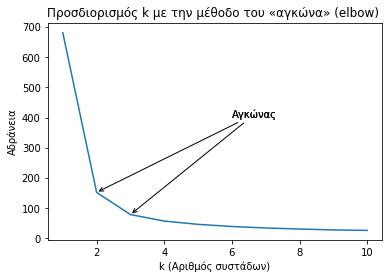

In [ ]:
plt.plot(range(1, 11), inert)
plt.title('Προσδιορισμός k με την μέθοδο του «αγκώνα» (elbow) ')
plt.xlabel('k (Αριθμός συστάδων)')
plt.ylabel('Αδράνεια') 
plt.annotate("Αγκώνας", xy=(2, inert[1]), xytext=(6, 400),arrowprops=dict(arrowstyle="->"))
plt.annotate("Αγκώνας", xy=(3, inert[2]), xytext=(6, 400),arrowprops=dict(arrowstyle="->"))
plt.show()

In [ ]:
from kneed import KneeLocator
kloc = KneeLocator(range(1, 11), inert, curve="convex", direction="decreasing")
print('Με βάση την μέθοδο του αγκώνα ο βέλτιστος αριθμός συστάδων είναι:',kloc.elbow)

Με βάση την μέθοδο του αγκώνα ο βέλτιστος αριθμός συστάδων είναι: 3


<font color='darkred'> Όπως βλέπουμε στο διάγραμμα ο βέλτιστος αριθμός συστάδων είναι 3, όπου σχηματίζεται ο δεύτερος "αγκώνας". Παρόλο που είναι εμφανές από το διάγραμμα χρησιμοποιήσα και την συνάρτηση KneeLocator που εντοπίζει ακριβώς αυτό. Στην συνέχεια υλοποιώ τον αλγόριθμο k-means με τη βιβλιοθήκη Scikit-Learn της Python χρησιμοποιώντας το k = 3 που βρέθηκε με την μέθοδο του "αγκώνα". 

In [ ]:
# αλγόριθμος k means με k = 3
km = KMeans(n_clusters=3, n_init = 10, random_state=30)
labels_kmeans = km.fit_predict(x)
print(labels_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


<font color='darkred'>Ολοκληρώνοντας την άσκηση εφόσον διαθέτουμε τα πραγματικά labels, κάτι το οποίο δεν  συμβαίνει στην πραγματικότητα σε προβλήματα μη επιβλεπόμενης μάθησης, μπορούμε να υλοποιήσουμε ελέγχους σχετικά με την απόδοση του αλγορίθμου, όπως να υπολογίζουμε την Ακρίβεια (Accuracy) και να σχεδιάσουμε την μήτρα λαθών (Confusion Matrix). Οι δύο αυτοί έλεγχοι απόδοσης φαίνονται παρακάτω.

In [ ]:
# υπολογισμός ακρίβειας
acc = sm.accuracy_score(y,labels_kmeans)
print('Η ακρίβεια του k-means είναι ίση με:', round(acc,4))

Η ακρίβεια του k-means είναι ίση με: 0.8933


Text(0.5, 15.0, 'Προβλεπόμενο label από k-means')

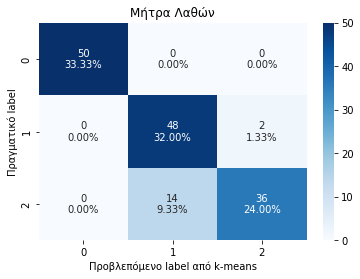

In [ ]:
# μήτρα λαθών
import seaborn as sns
matrix = sm.confusion_matrix(y,labels_kmeans)

group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Μήτρα Λαθών')
plt.ylabel('Πραγματικό label')
plt.xlabel('Προβλεπόμενο label από k-means')

<font color='darkred'> Παρατηρούμε πως ο k-means αποδίδει πολύ καλά με ακρίβεια περίπου 89.33%. Όσον αφορά την μήτρα λαθών, τα λάθη ταξινόμησης που συμβαίνουν είναι λίγα και αφορούν δείγματα που ανήκουν στις κλάσεις 1 και 2. Είναι αξιοσημείωτο πως ο αλγόριθμος προβλέπει τέλεια όλα τα δείγματα που ανήκουν στην κλάση 0. 

